In [102]:
import pandas as pd
import re
from wordcloud import STOPWORDS,WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mikyg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
# taking a csv file path and reading a dataframe

def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file is succesfully read")
        return df
    
    except FileNotFoundError:
        print("file not found")

In [104]:
df = read_proccessed_data('cleaned_tweets.csv')

file is succesfully read


In [105]:
# inspecting the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          21997 non-null  object 
 1   source              21997 non-null  object 
 2   original_text       21997 non-null  object 
 3   polarity            21997 non-null  float64
 4   subjectivity        21997 non-null  float64
 5   lang                21997 non-null  object 
 6   favorite_count      21997 non-null  int64  
 7   retweet_count       17257 non-null  float64
 8   original_author     21997 non-null  object 
 9   followers_count     21997 non-null  int64  
 10  friends_count       21997 non-null  int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            19138 non-null  object 
 13  user_mentions       18695 non-null  object 
 14  place               12106 non-null  object 
 15  friends_count       21997 non-null  float64
dtypes: f

In [106]:
# inspecting the polarity column
df['polarity']
df['polarity'].value_counts()

 0.000000    8982
-0.100000     973
 0.133333     782
 0.050000     502
 0.500000     502
             ... 
-0.014773       1
 0.478788       1
 0.059375       1
 0.010000       1
 0.207143       1
Name: polarity, Length: 829, dtype: int64

In [107]:
# Check if there are any null values and print the sum
total_null_inorginal_text = df['original_text'].isnull().sum()
total_null_inpolarity = df['polarity'].isnull().sum()

print(f'Total null values in oringal_text column: {total_null_inorginal_text}')
print(f'Total null values in polarity cloumn: {total_null_inpolarity}')

Total null values in oringal_text column: 0
Total null values in polarity cloumn: 0


In [108]:
# Count the number of english language tweets
df['lang'].value_counts()

en    21997
Name: lang, dtype: int64

In [110]:
# Create cleanedTweet dataframe
cleanedTweet = pd.DataFrame(columns = ['clean_text', 'polarity','subjectivity'])

cleanedTweet['clean_text'] = df['original_text']
cleanedTweet['polarity'] = df['polarity']
cleanedTweet['subjectivity'] = df['subjectivity']
cleanedTweet.dropna(inplace = True)

In [111]:
#Check for null values in the new dataframe
cleanedTweet.isnull().sum()

clean_text      0
polarity        0
subjectivity    0
dtype: int64

In [112]:
cleanedTweet

,clean_text,polarity,subjectivity
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625
1,RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000
2,"China even cut off communication, they don't a...",0.000000e+00,0.000000
3,"Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250
...,...,...,...
21992,RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000
21993,RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000
21994,@Reuters Thanks #Pelosi smart move.,2.071429e-01,0.421429
21995,RT @IndoPac_Info: #Taiwan people's Desire for ...,5.000000e-02,0.350000


In [113]:
# Removal of unwanted characters from the tweet like @,#,links, mentions and RTs
def tweetcleaner(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'RT[\S]+', '', text)
    return text

<>:3: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \(
<>:3: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \(
C:\Users\mikyg\AppData\Local\Temp\ipykernel_11084\3313435368.py:3: DeprecationWarning: invalid escape sequence \w
  text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
C:\Users\mikyg\AppData\Local\Temp\ipykernel_11084\3313435368.py:4: DeprecationWarning: invalid escape sequence \(
  text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)


In [114]:
#Apply "tweetcleaner" over the data
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(tweetcleaner)
cleanedTweet

,clean_text,polarity,subjectivity
0,RT ameztoy Extra random image I Lets focus in ...,-1.250000e-01,0.190625
1,RT Info China s media explains the military re...,-1.000000e-01,0.100000
2,China even cut off communication they don t an...,0.000000e+00,0.000000
3,Putin to XiJinping I told you my friend Taiwan...,1.000000e-01,0.350000
4,RT I m sorry I thought Taiwan was an independe...,-6.938894e-18,0.556250
...,...,...,...
21992,RT Info A good infographic of China s missile ...,7.000000e-01,0.600000
21993,RT Info A good infographic of China s missile ...,7.000000e-01,0.600000
21994,Thanks Pelosi smart move,2.071429e-01,0.421429
21995,RT Info Taiwan people s Desire for Unification...,5.000000e-02,0.350000


In [115]:
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].astype(str)
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].str.replace('[^\w\s]','')
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].str.replace('\w*\d\w*','')
cleanedTweet.head()

<>:2: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
C:\Users\mikyg\AppData\Local\Temp\ipykernel_11084\711455319.py:2: DeprecationWarning: invalid escape sequence \w
  cleanedTweet['clean_text'] = cleanedTweet['clean_text'].str.replace('[^\w\s]','')
C:\Users\mikyg\AppData\Local\Temp\ipykernel_11084\711455319.py:5: DeprecationWarning: invalid escape sequence \w
  cleanedTweet['clean_text'] = cleanedTweet['clean_text'].str.replace('\w*\d\w*','')
C:\Users\mikyg\AppData\Local\Temp\ipykernel_11084\711455319.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cleanedTweet['clean_text'] = cleanedTweet['clean_text'].str.replace('[^\w\s]','')
C:\Users\mikyg\AppData\Local\Temp\ipykernel_11084\711455319.py:5: FutureWarning: The default value of regex will change from True to False in a futur

,clean_text,polarity,subjectivity
0,rt ameztoy extra random image i lets focus one...,-1.250000e-01,0.190625
1,rt info china media explains military reasons ...,-1.000000e-01,0.100000
2,china even cut communication anwer phonecalls ...,0.000000e+00,0.000000
3,putin xijinping i told friend taiwan vassal st...,1.000000e-01,0.350000
4,rt i sorry i thought taiwan independent countr...,-6.938894e-18,0.556250


In [116]:
#Gives Score of negative, positive or neutral based on their polarity
def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "neutral"
    else:
        return "negative"

In [117]:
# creating score column by applying text_category
cleanedTweet['score'] = cleanedTweet['polarity'].apply(text_category)
cleanedTweet['score'].value_counts()

neutral     8982
positive    8182
negative    4833
Name: score, dtype: int64

<AxesSubplot:title={'center':'score'}>

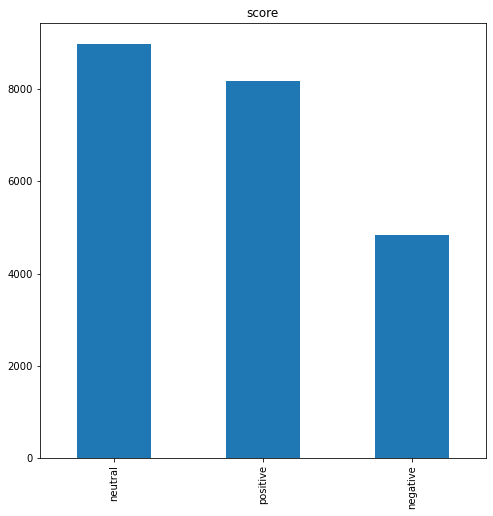

In [118]:
# Grouping the scores and plotting bar graph
score_count =  cleanedTweet['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[8, 8])

<AxesSubplot:title={'center':'Score'}, ylabel='score'>

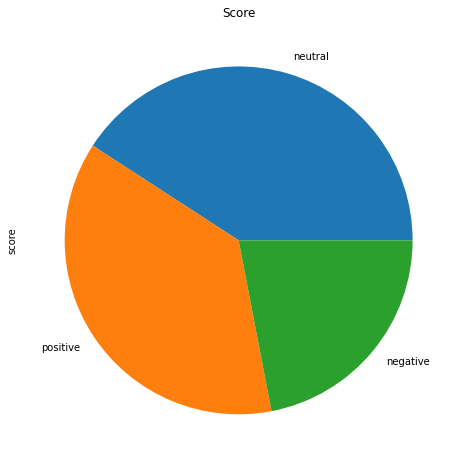

In [119]:
score_count.plot(kind="pie", y="score", title="Score", x="", figsize=[8, 8])

In [120]:
# takes a string and returns if a value is "neutral"
def remove_neutral(value):
    return value != "neutral"

In [121]:
# creating score_map column
# we remove all rows that have neutral score
# then create a score_map. if score is "positive" it has value 1 else 0

cleanedTweet = cleanedTweet[cleanedTweet['score'].map(remove_neutral)]
cleanedTweet['score_map'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)

C:\Users\mikyg\AppData\Local\Temp\ipykernel_11084\3228358333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedTweet['score_map'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)


In [122]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [123]:
# separating our input and output
(X, y) = cleanedTweet['clean_text'], cleanedTweet['score_map']

In [124]:
# creating CountVectorizer and fitting it
trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))
trigram_vectorizer.fit(X.values)

CountVectorizer(ngram_range=(1, 3))

In [125]:
# creating a tri_gram Vector representation for X
X_trigram = trigram_vectorizer.transform(X.values)

In [126]:
# creating a trigram tfidf transformer
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_trigram)

TfidfTransformer()

In [127]:
# creating a tfidf representation of x
X_train_tf_idf = trigram_tf_idf_transformer.transform(X_trigram)

In [128]:
# takes input as X, and ouput as Y, title of model as title
# split the input to train and valid
# use Stochastic Gradient Descent Classifier
# train
# out put the training score and validation score
def train_and_show_scores(X, y, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )

    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

In [129]:
# train using inputs vectorized as trigram
train_and_show_scores(X_trigram, y, title="trigram")

trigram
Train score: 1.0 ; Validation score: 0.94



In [130]:
# train using inputs vectorized as trigram_tfidf
train_and_show_scores(X_train_tf_idf, y, title="trigram_tf_idf")

trigram_tf_idf
Train score: 1.0 ; Validation score: 0.94



In [131]:
#Topic Modeling
import string
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models

In [132]:
def remove_stopwords(sent: str) -> str:
    sent_list = sent.split()
    return ' '.join([word for word in sent_list if word not in STOPWORDS])

In [133]:
class TopicModel:
    
    def __init__(self, tweet_df, num_of_topics):
        self.df = tweet_df
        self.num_of_topics = num_of_topics
    
    def extract_text_df(self):
        self.df = pd.DataFrame(self.df['original_text']) 
        
        return self.df
    
    
    def further_pre_process(self):
        
        self.df['original_text']= df['original_text'].apply(lambda x: str(x).translate(str.maketrans(' ', ' ', string.punctuation))) 
        
        self.df['original_text'] = self.df['original_text'].apply(remove_stopwords)
        
        return self.df
    
    def prepare_inputs(self):
        
        df = self.extract_text_df()
        df = self.further_pre_process()
        
        sentence_list = [text for text in self.df['original_text']]
        
        word_list = [sent.split() for sent in sentence_list]
        word_to_int = corpora.Dictionary(word_list)
        
        corpus = [word_to_int.doc2bow(tweet) for tweet in word_list]
        
        return word_list, word_to_int, corpus
    
    def lda_prepared(self, lda_model, corpus,  word_list):
        pyLDAvis.enable_notebook()
        LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, word_list)
        return LDAvis_prepared
            
    def build(self, show_print=False):
        word_list, word_to_int, corpus = self.prepare_inputs()
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus, id2word=word_to_int,num_topics=self.num_of_topics, 
            random_state=100, update_every=1, 
            chunksize=100, passes=10, alpha='auto',
            per_word_topics=True
        )
        
        lda_prepared = self.lda_prepared(lda_model, corpus, word_to_int)
        
        
        if show_print:
            pprint(lda_model.print_topics())
        
        return lda_model, lda_prepared

In [134]:
path = "cleaned_tweets.csv"
df = read_proccessed_data(path)
tm = TopicModel(df, 8)
lda_model, lda_prepared =tm.build(show_print=True)

file is succesfully read


C:\Users\mikyg\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


[(0,
  '0.092*"A" + 0.081*"missile" + 0.052*"good" + 0.048*"launches" + 0.047*"4th" '
  '+ 0.047*"infographic" + 0.045*"IndoPacInfo" + 0.044*"RT" + '
  '0.031*"httpstcoSTzRr9fhU5" + 0.021*"Maybe"'),
 (1,
  '0.086*"Taiwan" + 0.074*"RT" + 0.030*"China" + 0.025*"Chinas" + '
  '0.025*"military" + 0.016*"Taiwans" + 0.016*"August" + 0.015*"IndoPacInfo" + '
  '0.015*"ChinaTaiwanCrisis" + 0.013*"drills"'),
 (2,
  '0.063*"The" + 0.015*"China" + 0.012*"democratic" + 0.010*"Tensions" + '
  '0.010*"Taiwan" + 0.010*"minister" + 0.009*"tension" + 0.009*"crisis" + '
  '0.009*"ChinaTaiwan" + 0.009*"National"'),
 (3,
  '0.052*"RT" + 0.037*"island" + 0.028*"Taiwan" + 0.027*"Chinese" + '
  '0.025*"amp" + 0.022*"said" + 0.019*"waters" + 0.019*"3" + 0.016*"CCP" + '
  '0.016*"China"'),
 (4,
  '0.047*"RT" + 0.029*"Taiwan" + 0.021*"Ukraine" + 0.017*"Taiwan’s" + '
  '0.017*"China" + 0.015*"near" + 0.015*"found" + 0.014*"dead" + 0.012*"Gaza" '
  '+ 0.011*"people"'),
 (5,
  '0.055*"Taiwan" + 0.041*"RT" + 0.031*"

In [135]:
#Sentiment Analysis
cleanedTweet.head()

,clean_text,polarity,subjectivity,score,score_map
0,rt ameztoy extra random image i lets focus one...,-1.250000e-01,0.190625,negative,0
1,rt info china media explains military reasons ...,-1.000000e-01,0.100000,negative,0
3,putin xijinping i told friend taiwan vassal st...,1.000000e-01,0.350000,positive,1
4,rt i sorry i thought taiwan independent countr...,-6.938894e-18,0.556250,negative,0
5,rt we must let happen we must ready we must de...,2.000000e-01,0.500000,positive,1


In [136]:
# sentiment analysis is already provided by the TextBlob library in extract_dataframe.py

# Remove rows from cleanTweet where  polarity   =0  (i.e where  score  = Neutral) and reset the frame index.
print(cleanedTweet.shape)
cleanedTweet = cleanedTweet[cleanedTweet['score'] != 'neutral']
cleanedTweet.shape

(13015, 5)


(13015, 5)

In [137]:
# Construct a column  scoremap  Use the mapping {'positive':1, 'negative':0} on the  score  column
scoremaps = pd.Series([int(1) if row_val == 'positive' else int(0) for row_val in cleanedTweet['score']])
cleanedTweet = pd.concat([cleanedTweet, scoremaps.rename("scoremap")], axis=1)
cleanedTweet.head()

,clean_text,polarity,subjectivity,score,score_map,scoremap
0,rt ameztoy extra random image i lets focus one...,-1.250000e-01,0.190625,negative,0.0,0.0
1,rt info china media explains military reasons ...,-1.000000e-01,0.100000,negative,0.0,0.0
3,putin xijinping i told friend taiwan vassal st...,1.000000e-01,0.350000,positive,1.0,0.0
4,rt i sorry i thought taiwan independent countr...,-6.938894e-18,0.556250,negative,0.0,1.0
5,rt we must let happen we must ready we must de...,2.000000e-01,0.500000,positive,1.0,1.0
